In [6]:
#A1
import pandas as pd
import numpy as np
file_path = r"C:\Users\prabi\Downloads\Lab Session Data.xlsx"
buying_data = pd.read_excel(file_path, sheet_name = 'Purchase data')
matA = buying_data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].dropna().values
matC = buying_data['Payment (Rs)'].dropna().values
dim = matA.shape[1]
n_vec = matA.shape[0]
rank = np.linalg.matrix_rank(matA)
A_pseudo_inv = np.linalg.pinv(matA)
matX = A_pseudo_inv @ matC

print("Dimensionality = : ",dim)
print("No of vectors = ",n_vec)
print("Rank of matA: ",rank)
print("Cost of products: :")
print(" - Candies: Rs: {:.2f}".format(matX[0]))
print(" - Mangoes: Rs: {:.2f}".format(matX[1]))
print(" - Milk Packets: Rs: {:.2f}".format(matX[2]))

Dimensionality = :  3
No of vectors =  10
Rank of matA:  3
Cost of products: :
 - Candies: Rs: 1.00
 - Mangoes: Rs: 55.00
 - Milk Packets: Rs: 18.00


In [ ]:
#A2 Same as A1

In [ ]:
#A3
import pandas as pd
import numpy as np
file_path = r"C:\Users\prabi\Downloads\Lab Session Data.xlsx"
buying_data = pd.read_excel(file_path, sheet_name = 'Purchase data')
matA = buying_data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].dropna().values
matC = buying_data['Payment (Rs)'].dropna().values
dim = matA.shape[1]
n_vec = matA.shape[0]
rank = np.linalg.matrix_rank(matA)
A_pseudo_inv = np.linalg.pinv(matA)
matX = A_pseudo_inv @ matC

print("Dimensionality = : ",dim)
print("No of vectors = ",n_vec)
print("Rank of matA: ",rank)
print("Cost of products: :")
print(" - Candies: Rs: {:.2f}".format(matX[0]))
print(" - Mangoes: Rs: {:.2f}".format(matX[1]))
print(" - Milk Packets: Rs: {:.2f}".format(matX[2]))
buying_data['status'] = buying_data['Payment (Rs)'].apply(lambda x: "RICH" if x > 200 else "POOR")
print(buying_data[['Payment (Rs)', 'status']].head())

Mean =  1560.663453815261
Variance =  58732.365352539186
Wednesday mean: 1550.71
Wednesday Comparison : -9.96
April data:  1698.95
April comparison : 138.29
Probability of Loss: 0.50
Probability of Making a Profit on Wednesday: 0.42
Profit if wednesday: 0.42000000000000004


C:\Users\prabi\AppData\Local\Temp\ipykernel_4436\3810624706.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wed_prof = wednesday[chg < 0].shape[0]


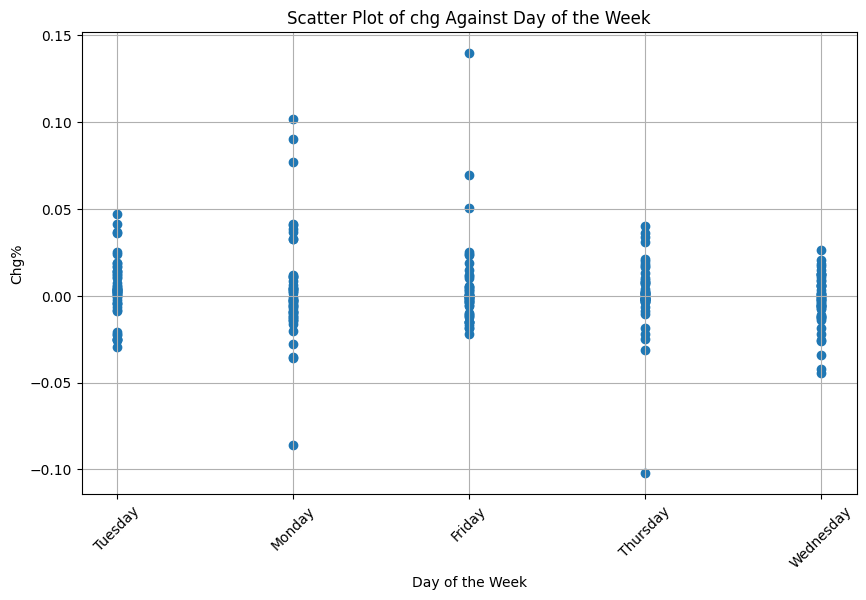

In [2]:
#A4
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
file_path = r"C:\Users\prabi\Downloads\Lab Session Data.xlsx"
buying_data = pd.read_excel(file_path, sheet_name = 'IRCTC Stock Price')
data_of_price = buying_data.iloc[:, 3]
mean = statistics.mean(data_of_price)
variance = statistics.variance(data_of_price)
print("Mean = ",mean)
print("Variance = ",variance)

buying_data['Date'] = pd.to_datetime(buying_data['Date'])
wednesday = buying_data[buying_data['Date'].dt.day_name() == 'Wednesday']
mean_wed = statistics.mean(wednesday['Price'])
print(f"Wednesday mean: {mean_wed:.2f}")
print(f"Wednesday Comparison : {mean_wed - mean:.2f}")

apr_data = buying_data[buying_data['Date'].dt.month == 4]
mean_apr = statistics.mean(apr_data['Price'])
print(f"April data: {mean_apr: .2f}")
print(f"April comparison : {mean_apr - mean:.2f}")

chg = buying_data.iloc[:, 8]
loss_prob = np.mean(chg < 0)
print(f"Probability of Loss: {loss_prob:.2f}")

wed_prof = wednesday[chg < 0].shape[0]
total_wed = wednesday.shape[0]
prob_wed_prof = 1-(wed_prof/total_wed)
print(f"Probability of Making a Profit on Wednesday: {prob_wed_prof:.2f}")

prof_if_wed = prob_wed_prof
print(f"Profit if wednesday: {prof_if_wed}")

buying_data['Day of Week'] = buying_data['Date'].dt.day_name()
plt.figure(figsize=(10, 6))
plt.scatter(buying_data['Day of Week'], buying_data['Chg%'])
plt.title('Scatter Plot of chg Against Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Chg%')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                

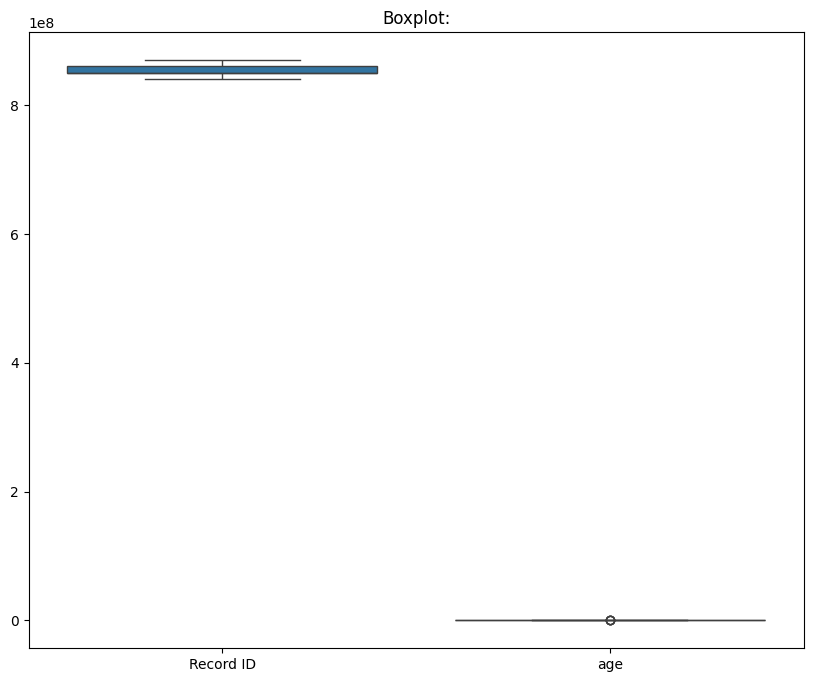

Mean values:  Record ID    8.529473e+08
age          7.355582e+01
dtype: float64
Standard deviation values:  Record ID    7.581969e+06
age          1.183977e+03
dtype: float64


In [1]:
#A5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
file_path = r"C:\Users\prabi\Downloads\Lab Session Data.xlsx"
df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')
df.head()
df.head()

# Identify the type of attribute
attribute_types = df.dtypes
print(attribute_types)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

# Summary statistics for numeric data
numeric_summary = df.describe()
print(numeric_summary)

# Count missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

# Plot boxplot for numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[numeric_columns])
plt.title('Boxplot:')
plt.show()

# Calculate mean and standard deviation
mean_vals = df[numeric_columns].mean()
std_vals = df[numeric_columns].std()

print("Mean values: ", mean_vals)
print("Standard deviation values: ", std_vals)

Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                

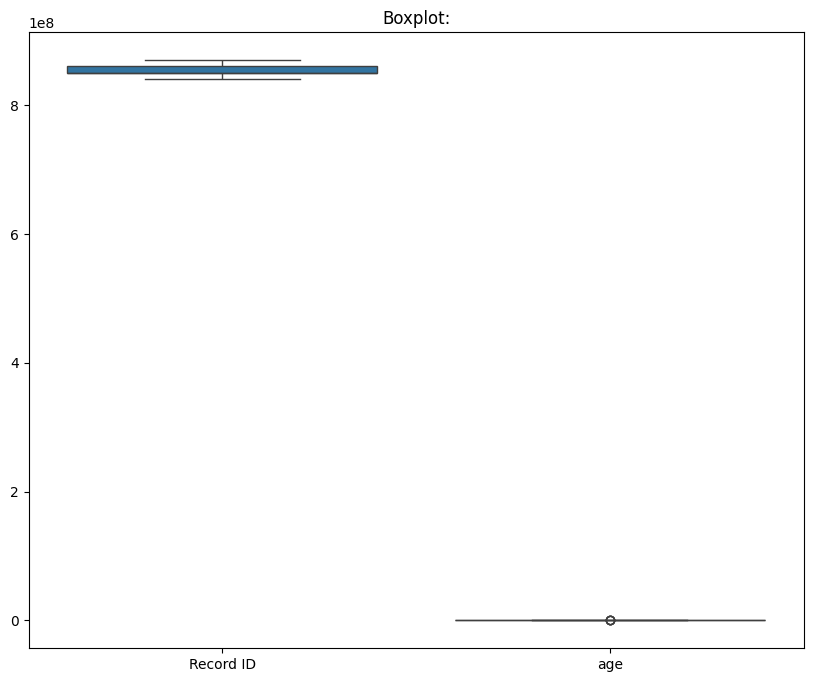

Mean values:  Record ID    8.529473e+08
age          7.355582e+01
dtype: float64
Standard deviation values:  Record ID    7.581969e+06
age          1.183977e+03
dtype: float64


C:\Users\prabi\AppData\Local\Temp\ipykernel_14120\1208286283.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\prabi\AppData\Local\Temp\ipykernel_14120\1208286283.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

(   Record ID  age sex on thyroxine query on thyroxine  \
 0  840801013   29   F            f                  f   
 1  840801014   29   F            f                  f   
 2  840801042   41   F            f                  f   
 3  840803046   36   F            f                  f   
 4  840803047   32   F            f                  f   
 
   on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
 0                         f    f        f               f              f  ...   
 1                         f    f        f               f              f  ...   
 2                         f    f        f               f              f  ...   
 3                         f    f        f               f              f  ...   
 4                         f    f        f               f              f  ...   
 
   TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
 0            f    ?            f   ?            f   ?            f   ?   
 1    

In [2]:
#A6
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

file_path = r"C:\Users\prabi\Downloads\Lab Session Data.xlsx"
df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')
df.head()
attribute_types = df.dtypes
print(attribute_types)
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()
numeric_summary = df.describe()
print(numeric_summary)
missing_values = df.isnull().sum()
print(missing_values)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[numeric_columns])
plt.title('Boxplot:')
plt.show()
mean_vals = df[numeric_columns].mean()
std_vals = df[numeric_columns].std()
print("Mean values: ", mean_vals)
print("Standard deviation values: ", std_vals)
categorical_columns = df.select_dtypes(include=['object']).columns
for col in numeric_columns:
    if (df[col] - df[col].mean()).abs().max() <= 3 * df[col].std():
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
missing_values_after_imputation = df.isnull().sum()

df.head(), missing_values_after_imputation


Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                

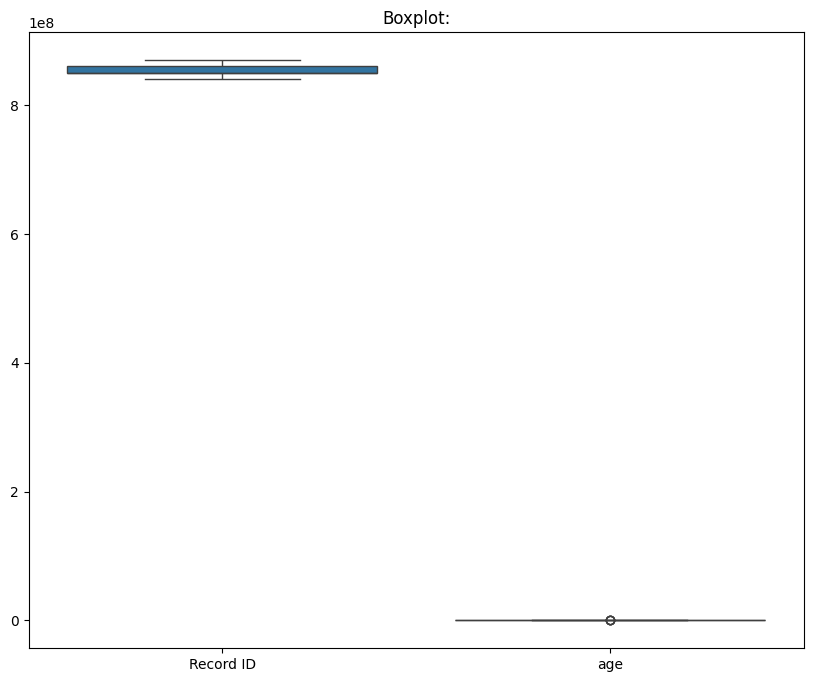

Mean values:  Record ID    8.529473e+08
age          7.355582e+01
dtype: float64
Standard deviation values:  Record ID    7.581969e+06
age          1.183977e+03
dtype: float64
Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI               

C:\Users\prabi\AppData\Local\Temp\ipykernel_14120\1153038602.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\prabi\AppData\Local\Temp\ipykernel_14120\1153038602.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
file_path = r"C:\Users\prabi\Downloads\Lab Session Data.xlsx"
df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')
df.head()
attribute_types = df.dtypes
print(attribute_types)
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()
numeric_summary = df.describe()
print(numeric_summary)
missing_values = df.isnull().sum()
print(missing_values)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[numeric_columns])
plt.title('Boxplot:')
plt.show()
mean_vals = df[numeric_columns].mean()
std_vals = df[numeric_columns].std()
print("Mean values: ", mean_vals)
print("Standard deviation values: ", std_vals)
categorical_columns = df.select_dtypes(include=['object']).columns
for col in numeric_columns:
    if (df[col] - df[col].mean()).abs().max() <= 3 * df[col].std():
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
missing_values_after_imputation = df.isnull().sum()
print(missing_values_after_imputation)
print(df[numeric_columns].describe())
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_columns] = scaler.fit_transform(df[numeric_columns])
print(df_normalized.head())
scaler_standard = StandardScaler()
df_standardized = df.copy()
df_standardized[numeric_columns] = scaler_standard.fit_transform(df[numeric_columns])
print(df_standardized.head())


In [5]:
#A8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
file_path = r"C:\Users\prabi\Downloads\Lab Session Data.xlsx"
df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')
binary_cols = ['FTI', 'T3', 'TSH']
df_withoutnan = df[binary_cols].dropna()
binary_cols = ['FTI', 'T3', 'TSH']
vec1 = df_withoutnan.iloc[0].values
vec2 = df_withoutnan.iloc[1].values
f00 = np.sum((vec1 == 0) & (vec2 == 0))
f01 = np.sum((vec1 == 0) & (vec2 == 1))
f10 = np.sum((vec1 == 1) & (vec2 == 0))
f11 = np.sum((vec1 == 1) & (vec2 == 1))
JC = f11 / (f01 + f10 + f11)
SMC = (f11 + f00) / (f00 + f01 + f10 + f11)
print("JC is: {:.4f}".format(JC))
print("SMC is: {:.4f}".format(SMC))


JC is: nan
SMC is: nan


C:\Users\prabi\AppData\Local\Temp\ipykernel_24592\3702901829.py:18: RuntimeWarning: invalid value encountered in scalar divide
  JC = f11 / (f01 + f10 + f11)
C:\Users\prabi\AppData\Local\Temp\ipykernel_24592\3702901829.py:19: RuntimeWarning: invalid value encountered in scalar divide
  SMC = (f11 + f00) / (f00 + f01 + f10 + f11)


In [6]:
#A9
import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine
file_path = r"C:\Users\prabi\Downloads\Lab Session Data.xlsx"
df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')
num_data = df.select_dtypes(include=[np.number])
if len(num_data) >= 2:
    vec1_full = num_data.iloc[0].values
    vec2_full = num_data.iloc[1].values
    print("Vector 1:", vec1_full)
    print("Vector 2:", vec2_full)
    cosine_similarity = 1 - cosine(vec1_full, vec2_full)
    print("Cosine Similarity: {:.4f}".format(cosine_similarity))
else:
    print("Cannot find cosine similarity; not enough numeric data.")

Vector 1: [840801013        29]
Vector 2: [840801014        29]
Cosine Similarity: 1.0000


C:\Users\prabi\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\spatial\distance.py:647: RuntimeWarning: overflow encountered in scalar multiply
  dist = 1.0 - uv / math.sqrt(uu * vv)


In [ ]:
#A10
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import pairwise_distances
file_path = r"C:\Users\prabi\Downloads\Lab Session Data.xlsx"
df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')
data_set = df.iloc[:20]
for c in data_set.columns:
    if data_set[c].dtype == 'object':
        le = LabelEncoder()
        data_set[c] = le.fit_transform(data_set[c].astype(str))
data_set2 = data_set.values
jc_sim = 1 - pairwise_distances(data_set2, metric='jaccard')
smc_sim = 1 - pairwise_distances(data_set2, metric=lambda u, v: np.sum(u == v) / len(u))
cosine_sim = 1 - pairwise_distances(data_set2, metric='cosine')
plt.figure(figsize=(10, 8))
sns.heatmap(jc_sim, annot=True, cmap='coolwarm')
plt.title('Jaccard Similarity Heatmap')
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(smc_sim, annot=True, cmap='coolwarm')
plt.title('Simple Matching Similarity Heatmap')
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim, annot=True, cmap='coolwarm')
plt.title('Cosine Similarity Heatmap')
plt.show()
